# Decision Trees



## Some beautiful visualisations

Have a look at this elegant demonstration of D3 showing decision
trees at work

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/


## Titanic

In this lab we will explore the passengers on the Titanic again.

In [18]:
# You will want to use the pandas library, and sklearn.tree
import pandas
import sklearn.tree

In [19]:
# Read in the file titanic.csv (which is in the data/ folder)
titanic_data = pandas.read_csv('../../data/titanic.csv')

In [20]:
# Since we need numeric data, add another numeric column based
# upon the "Sex" column (e.g. male=0, female=1)

from sklearn import preprocessing
numeric_sex = preprocessing.LabelEncoder()

titanic_data['Sex_Numeric'] = numeric_sex.fit_transform(titanic_data.Sex)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [21]:
# Either drop rows where the age isn't known, or fill with
# the mean value
mean_age = int(titanic_data.Age.mean())
titanic_data[titanic_data.Age.notnull()]

titanic_data.Age.fillna(value=mean_age, inplace=True)

In [22]:
# Create a DecisionTreeClassifier which splits based on 
# entropy with a depth of 1
DecisionTree_Classifier = sklearn.tree.DecisionTreeClassifier(criterion='entropy',max_depth=1)

In [23]:
# Try to predicted the 'Survived' column from 'Pclass', 'Age' and gender
DecisionTree_Classifier.fit(titanic_data[['Pclass','Age','Sex_Numeric']],titanic_data[['Survived']])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
# Use the feature_importances_ to identify what was the most important
# criteria in survival on the Titanic
DecisionTree_Classifier.feature_importances_

array([ 0.,  0.,  1.])

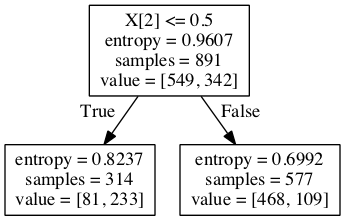

In [25]:
# Not invluded in Lab, just wanted to visualise the Decision Tree Classifier
import StringIO
import IPython.display
import pydot

File_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(DecisionTree_Classifier, out_file=File_obj)
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [26]:
# Create a deeper DecisionTreeClassifier (e.g. max_depth=3)
DecisionTree_Deep_Classifier = sklearn.tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [27]:
# We would like to display this as a tree. 
# import StringIO and create a StringIO object which we
# can use as a file
DecisionTree_Deep_Classifier.fit(titanic_data[['Pclass','Age','Sex_Numeric']],titanic_data[['Survived']])

import StringIO
File_obj = StringIO.StringIO()

In [28]:
# import the sklearn.tree library and use the export_graphviz
# method to write your deeper decision tree out to the StringIO
# file object
sklearn.tree.export_graphviz(DecisionTree_Deep_Classifier, out_file=File_obj)

In [29]:
# confirm that there is some data in your StringIO object
# using the .getvalue() method. You might want to print it
# as it has a lot of newline characters in it
File_obj.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 0.5\\nentropy = 0.9607\\nsamples = 891\\nvalue = [549, 342]"] ;\n1 [label="X[0] <= 2.5\\nentropy = 0.8237\\nsamples = 314\\nvalue = [81, 233]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[1] <= 2.5\\nentropy = 0.2988\\nsamples = 170\\nvalue = [9, 161]"] ;\n1 -> 2 ;\n3 [label="entropy = 1.0\\nsamples = 2\\nvalue = [1, 1]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.2762\\nsamples = 168\\nvalue = [8, 160]"] ;\n2 -> 4 ;\n5 [label="X[1] <= 38.5\\nentropy = 1.0\\nsamples = 144\\nvalue = [72, 72]"] ;\n1 -> 5 ;\n6 [label="entropy = 0.9959\\nsamples = 132\\nvalue = [61, 71]"] ;\n5 -> 6 ;\n7 [label="entropy = 0.4138\\nsamples = 12\\nvalue = [11, 1]"] ;\n5 -> 7 ;\n8 [label="X[0] <= 1.5\\nentropy = 0.6992\\nsamples = 577\\nvalue = [468, 109]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="X[1] <= 17.5\\nentropy = 0.9498\\nsamples = 122\\nvalue = [77, 45]"] ;\n8 -> 9 ;\n10 [label="entro

In [30]:
# import the pydot library and use the function graph_from_dot_data
# to create a graph object
# If it all goes very badly, with lots of errors, then try pyplot2 instead
# and look at this:
# http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will/17902926#17902926

import pydot
Graph = pydot.graph_from_dot_data(File_obj.getvalue())

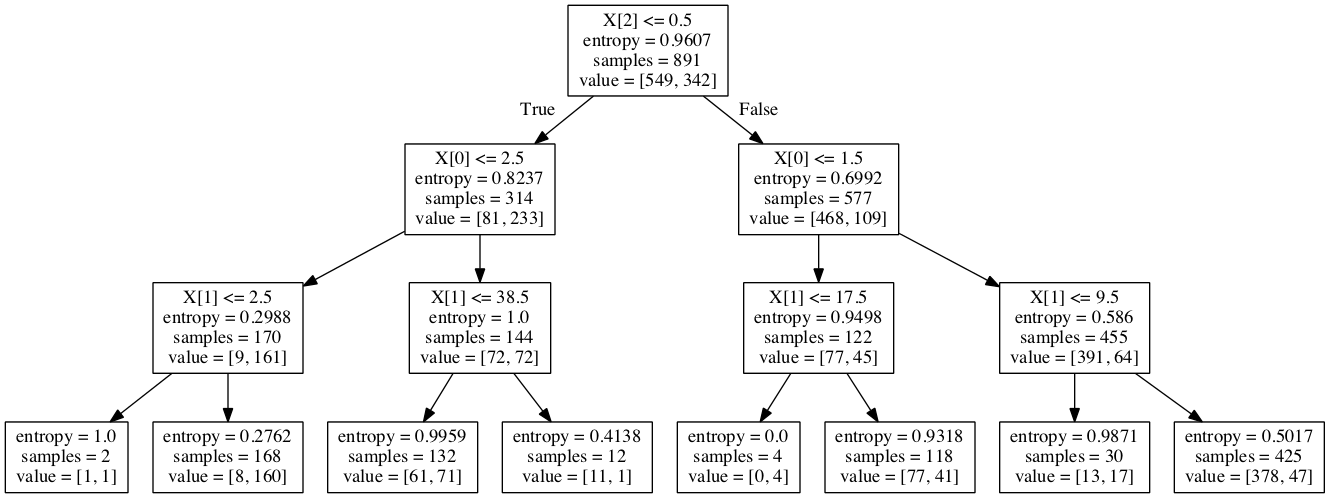

In [31]:
# import IPython.display and create an Image object from the graph
# object. It should display automatically inline here.

import IPython.display
IPython.display.Image(Graph.create_png())

In [33]:
# Trace through this graph manually.
# What would you expect would happen
# to a 26-year old woman in first class?
# Compare that to the predict method's output.
DecisionTree_Deep_Classifier.predict([1,26,0])

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [55]:
# Did it get it right? What happened to Miss. Ellen "Nellie" Barber?
titanic_data[titanic_data.Name == 'Barber, Miss. Ellen "Nellie"']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Numeric
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.85,NaN,S,0
